### Deep Neural Network Regression

## usage

2022-10-26 11:48:36.658872: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-26 11:48:36.659250: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/var/folders/x2/4k1n7c3d5zx3_5sp7x24yzzw0000gn/T/ipykernel_98715/3067453854.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["horsepower"] = cleaned["horsepower"].astype("float")


Metal device set to: Apple M1


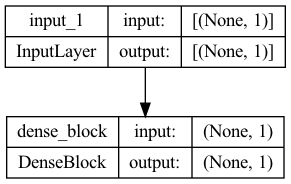

In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from bpyutils.util._dict import AutoDict
import numpy as np
import pandas as pd
import deeply

auto_mpg = pd.read_csv("./auto-mpg.csv")
cleaned  = auto_mpg.dropna()
cleaned  = auto_mpg[ ~auto_mpg["horsepower"].str.contains("\?") ]
cleaned["horsepower"] = cleaned["horsepower"].astype("float")
X, y = cleaned['horsepower'].values, cleaned['mpg'].values

scaler = AutoDict(MinMaxScaler)
X_norm = scaler["X"].fit_transform(X.reshape(-1, 1))
y_norm = scaler["y"].fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm)

model = deeply.hub("linreg", learning_rate = 0.001)
model.plot()

## example

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2022-10-26 11:48:40.211877: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-26 11:48:45.817188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-26 11:48:52.170792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 24ms/step


2022-10-26 11:55:46.465107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


R2 Score: 0.32334763


(<Figure size 640x480 with 5 Axes>,
 array([<AxesSubplot: title={'center': 'loss'}>,
        <AxesSubplot: title={'center': 'mae'}>,
        <AxesSubplot: title={'center': 'mse'}>,
        <AxesSubplot: title={'center': 'mape'}>,
        <AxesSubplot: title={'center': 'r2_score'}>], dtype=object))

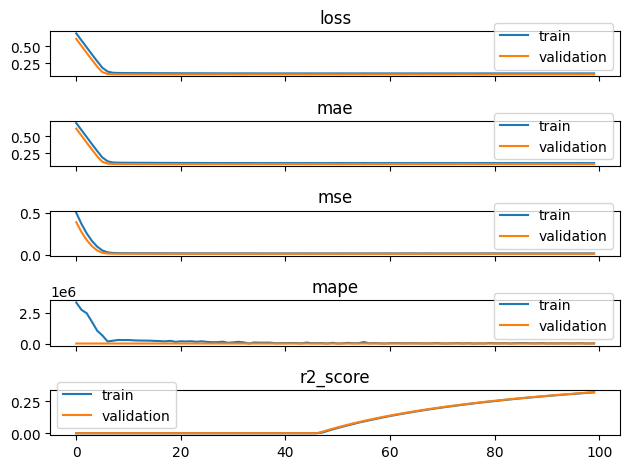

In [2]:
from deeply.plots import history as history_plot
from deeply.metrics import r2_score
from tqdm.auto import trange

config = { "epochs": 100, "batch_size": 3 }

history = model.fit(X_train, y_train,
                     batch_size = config["batch_size"],
                     epochs = config["epochs"],
                     validation_split = 0.2)

y_pred = model.predict(X_test)
print("R2 Score: %s" % r2_score(y_test, y_pred).numpy())

history_plot(history)